<a href="https://colab.research.google.com/github/sowmya-520/AI/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Assignment-4***

Estimate the bicarbonates of well water based on its pH value using simple regression model. Consider SGD optimizer. Dataset: Union Carbide Technical Report
*   Do the manual calculation for two iteration by taking only first two samples in the dataset.Write the python code to build simple linear regression model using SGD optimizer
*   Do the data normalization
*   Split the data for train and test (90:10)
*   Train the simple linear regression model using SGD
*   Compute MSE, RMSE and MAE with training data and Training Data.


**Mount Google Drive**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing libraries**

In [21]:
import numpy as np
import random
import pandas as pd
import math as mt 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import matplotlib.pyplot as plt

**Load Data**

In [22]:
data = pd.read_csv('/content/drive/MyDrive/slr09 (2).csv')
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


**Missing Values Treatement**

In [23]:
print(data.isnull().sum())

X    0
Y    0
dtype: int64


In [24]:
m1=np.mean(data['X']) 
m2=np.mean(data['Y']) 
data['X'].fillna(value=m1,inplace=True) 
data['Y'].fillna(value=m2,inplace=True)

**Outliers Treatement**

In [25]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [26]:
sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in X column from Z-scores method: ", sample_outliers_X)
print("Outliers in Y column from Z-scores method: ", sample_outliers_Y)

Outliers in X column from Z-scores method:  []
Outliers in Y column from Z-scores method:  []


**Split Data**

---


> 90%-->training
    10%-->Testing


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.1, random_state = 10)

**Intialisation**

In [28]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.01
max_iter=10000

**Gradient Calculation**

In [29]:
def gradient(m,c,x,y):
  m_deriv=-1*(y-m*x-c)*x
  c_deriv=-1*(y-m*x-c)
  return m_deriv,c_deriv

**Training Using Stochastic Gradient Descent Optimizer**

In [30]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m,del_c=gradient(m, c, x_train.iloc[sample], y_train.iloc[sample])
    m=m-eta*del_m
    c=c-eta*del_c
print('model parameter m and c',m,c)

model parameter m and c -38.01227589936609 446.32700611053747


**Model Prediction on Training Data**

In [31]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

**Model Prediction on Testing Data**

In [32]:
y_pred_test = []
for i in x_test:
  y_p_te = (m * i) + c
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

**Error Metrics Calculation**

In [33]:
#Training Accuracies
rmse = mt.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)
r2_score1=metrics.r2_score(y_train,y_pred_train)
print('R squared Error : ',r2_score1)

Root mean square error 52.23815595099945
Mean square error 2728.824937160939
Mean absolute error 42.36625081909641
R squared Error :  0.10300411420864386


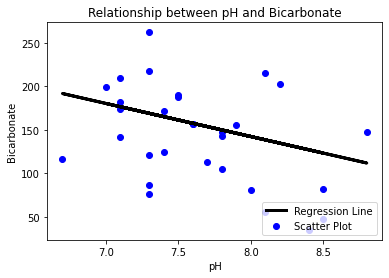

In [34]:
plt.scatter(x_train, y_train, color = 'blue', label='Scatter Plot')
plt.plot(x_train, y_pred_train, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between pH and Bicarbonate')
plt.xlabel('pH')
plt.ylabel('Bicarbonate')
plt.legend(loc=4)
plt.show()

In [35]:
#Testing Accuracies
mse = mt.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)
r2_score=metrics.r2_score(y_test,y_pred_test)
print('R squared Error : ',r2_score)

Root mean square error 59.451504967050795
Mean square error 3534.481442847265
Mean absolute error 55.203375872325665
R squared Error :  -0.24863003876170198


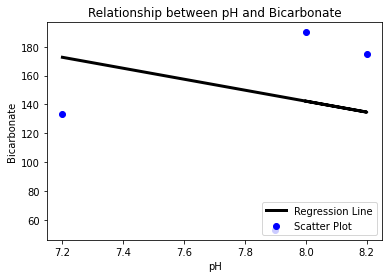

In [36]:
plt.scatter(x_test, y_test, color = 'blue', label='Scatter Plot')
plt.plot(x_test, y_pred_test, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between pH and Bicarbonate')
plt.xlabel('pH')
plt.ylabel('Bicarbonate')
plt.legend(loc=4)
plt.show()

**Save Model For Deployment**

In [37]:
i=float(input('enter pH Level : '))
Bicarbonate=m*i+c
print('pH of well water : ',float(i))
print('Bicarbonate (parts per million) of well water: ',Bicarbonate)

enter pH Level : 5.2
pH of well water :  5.2
Bicarbonate (parts per million) of well water:  248.6631714338338
